<a href="https://colab.research.google.com/github/Derrypearl/Dissertation-code-1/blob/main/Dissertation_code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [4]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


In [10]:
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

In [11]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8359
Testing Accuracy: 0.8571


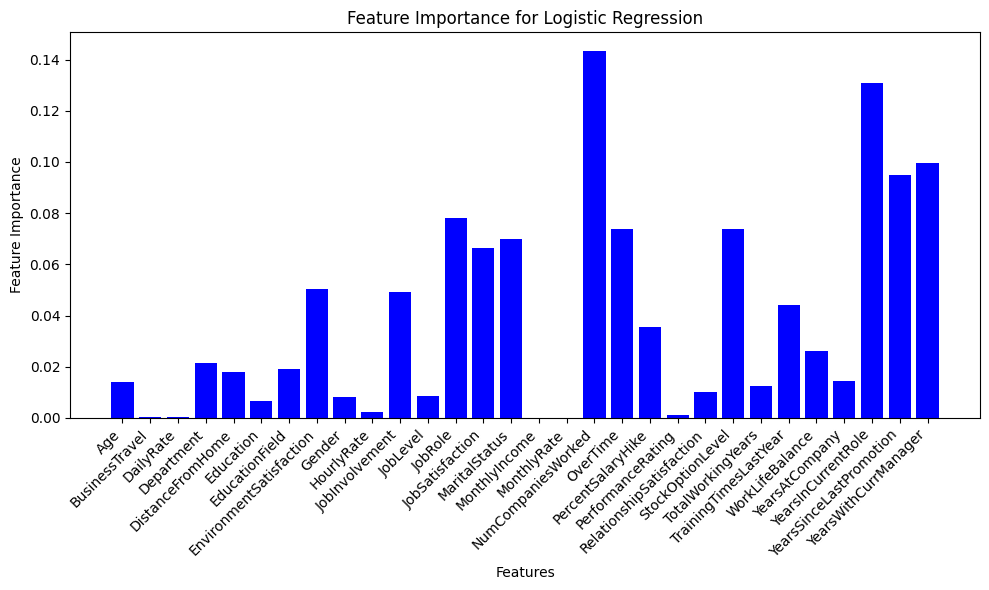

In [12]:
# Get the coefficients (weights) of the model
coefficients = model.coef_[0]

# Calculate feature importance (absolute value of coefficients)
feature_importance = abs(coefficients)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance, color='blue')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Logistic Regression')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

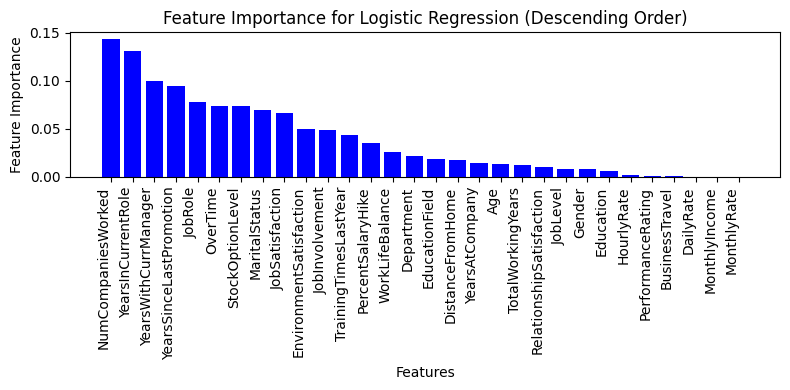

In [13]:
# Get the coefficients (weights) of the model
coefficients = model.coef_[0]

# Calculate feature importance (absolute value of coefficients)
feature_importance = abs(coefficients)

# Get the indices that would sort the feature_importance array in descending order
sorted_indices = feature_importance.argsort()[::-1]

# Reorder feature names based on sorted indices
sorted_feature_names = [X.columns[i] for i in sorted_indices]

# Reorder feature importance values
sorted_feature_importance = feature_importance[sorted_indices]

# Create a bar plot to visualize feature importance (descending order)
plt.figure(figsize=(8, 4))
plt.bar(sorted_feature_names, sorted_feature_importance, color='blue')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Logistic Regression (Descending Order)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()





In [14]:
# Reorder feature names based on sorted indices
sorted_feature_names = [X.columns[i] for i in sorted_indices]

# Reorder feature importance values
sorted_feature_importance = feature_importance[sorted_indices]

# Print feature names and their importance values
for name, importance in zip(sorted_feature_names, sorted_feature_importance):
    print(f"{name}: {importance:.4f}")

NumCompaniesWorked: 0.1434
YearsInCurrentRole: 0.1309
YearsWithCurrManager: 0.0996
YearsSinceLastPromotion: 0.0948
JobRole: 0.0780
OverTime: 0.0739
StockOptionLevel: 0.0737
MaritalStatus: 0.0699
JobSatisfaction: 0.0663
EnvironmentSatisfaction: 0.0503
JobInvolvement: 0.0493
TrainingTimesLastYear: 0.0442
PercentSalaryHike: 0.0355
WorkLifeBalance: 0.0262
Department: 0.0214
EducationField: 0.0191
DistanceFromHome: 0.0181
YearsAtCompany: 0.0145
Age: 0.0140
TotalWorkingYears: 0.0123
RelationshipSatisfaction: 0.0103
JobLevel: 0.0085
Gender: 0.0081
Education: 0.0066
HourlyRate: 0.0024
PerformanceRating: 0.0011
BusinessTravel: 0.0006
DailyRate: 0.0002
MonthlyIncome: 0.0001
MonthlyRate: 0.0000
